# Домашнее задание Ⅳ

## IV.11.18

> Для нахождения положительного корня нелинейного уравнения $f(x)=\sin(x)-x^2+1=0$ предложено несколько вариантов МПИ $x_{n+1}=g(x_n)$. Исследовать эти методы и сделать выводы о целесообразности использования каждого из них
> 1. $g_1(x)=\arcsin(x^2-1)$
> 2. $g_2(x)=\sqrt{\sin x+1}$
> 3. $g_3(x)=(\sin x+1)/x$
> 4. $g_4(x)=x+0.1\cdot(\sin x-x^2+1)$

### Решение
- Корень единственный (см. график), его локализация $x^*\in(1,\frac{\pi}{2})$, так как
$$f(1)=\sin 1-1+1=\sin 1>0$$
$$f\left(\frac{\pi}{2}\right)=2-\left(\frac{\pi}{2}\right)^2<0$$

- Варианты МПИ представлены в условии.

- Сходимость на области локализации:

    1. $$g_1'(x)=\frac{2}{\sqrt{2-x^2}}$$
        область локализации не входит в ОДЗ $g_1\Rightarrow$ ничего нельзя сказать о сходимости метода;

    2. $$g_2'(x)=\frac{\cos x}{2\sqrt{1+x}}$$
        $$|g_2'(x)|\le\frac{1}{2\sqrt{1+0}}=\frac{1}{2}<1$$
        сходится по достаточному условию;

    3. $$g_3'(x)=\frac{x\cos x-1-\sin x}{x^2}$$
        $$\sup|g_3'(x)|\ge|g_3'(1)|=1+\sin 1-\cos 1>1$$
        ничего нельзя сказать о сходимости;


    4. $$g_4'(x)=1+0.1(\cos x-2x)$$
        $$|g_4'(x)|\le\sup|g_4'(x)|=|g_4'(1)|=0.8+0.1\cos 1<1$$
        сходится по достаточному условию.

### Вывод
- Второй и четвертый методы сойдутся, причем оценочное число итераций второго метода будет меньше, чем четвертого, поскольку $q_2<q_4$.
- В третьем методе возможно сузить область локализации до $(1.4, \frac{\pi}{2})$, тогда $|g_3'(x)|\in[0.8; 0.9]$, и достаточное условие выполнится.
- Даже если сузить область локализации в первом методе, она все еще будет содержать $x^*=1.409624\ldots\Rightarrow g_1'(x^*)\approx 17.52$, и достаточное условие не выполнится.

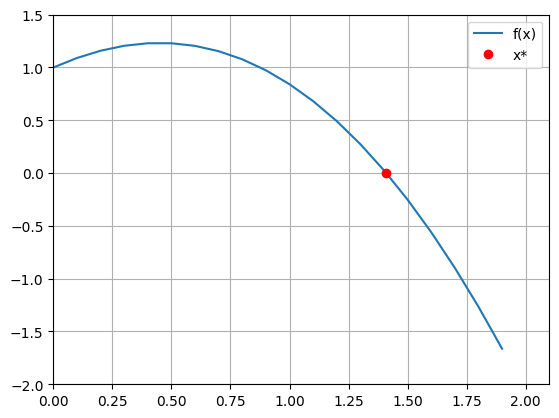

In [30]:
import matplotlib.pyplot as plt
import numpy as np


x = np.arange(0, 2, 0.1)
plt.axis([0, 2.1, -2, 1.5])
plt.grid(True)
plt.plot(x, np.sin(x)-x**2+1, 1.409624, 0, 'ro') 
plt.legend(['f(x)', 'x*'], loc='best')
plt.show()

## IV.12.4л$^*$

> Отделить корни уравнения $x2^x=1$ и реализовать сходящийся метод простых итераций и метод Ньютона. Для метода простых итераций оценить количество итераций $k$, необходимое для достижения точности $|x^*-x^k|\le10^{−3}$. Метод Ньютона запускать с начального приближения, полученного методом простой итерации. Сходится ли метод Ньютона? Если сходится, то через какое количество итераций ответ перестает меняться.

$$f(x)=x\cdot 2^x-1=0$$

### Метод простых итераций

- Отделение корней. $f(x)$ меньше 0 при $x<0$ и строго возрастает на $[0,+\infty)$, поэтому имеет не более 1 корня.
    $$f(0)=-1, f(1)=1\Rightarrow x^*\in(0,1)$$

- $f(x)=0\Leftrightarrow x=g(x)$, тогда МПИ $x^{k+1}=g(x^k)$. Варианты $g$:
    1. $g_1(x)=2^{-x}$
    2. $g_2(x)=-\log_2 x$ 

- Сходимость
    1. $$g_1'(x)=-2^{-x}\ln 2$$
        $$\sup{|g_1'(x)|}=|g'(0)|=\ln 2<1$$
        сходится по достаточному условию;
    2. $$g_2'(x)=-\frac{1}{x\ln 2}$$
        $$|g_2'(x)|>1\ \forall x\in(0,1)$$
        ничего нельзя сказать о сходимости.

- Количество итераций $k$ для $g_1$
    $$k\le\log_q\frac{\varepsilon}{b-a}=\log_{\ln 2}\frac{10^{-3}}{1}\approx 19$$

Программная реализация

In [31]:
def fpi(x: float, k: int, g: callable) -> float:
    for _ in range(k):
        x = g(x)
    return x

g = lambda x: 2**(-x)
x_fpi = fpi(0.5, 19, g)
print(x_fpi)

0.6411857742000348


$x^*=0.6411857445049859844862004821148236665628\ldots\Rightarrow|x^*-x_\text{fpi}|\le 10^{-7}<\varepsilon$.

### Метод Ньютона

$$f(x)\in C^2[0,1]$$
$$f'(x)=2^x(1+x\ln 2)$$
$$f''(x)=2^x\ln 2(2+x\ln 2)$$

Построение:
$$x^{k+1}=x^k-\frac{f(x^k)}{f'(x^k)}$$

Сходимость имеет место при условии
$$C_1^2 C_2|f(x^0)|\le q<1$$
где $x^0=x_\text{fpi}$ &mdash; начальное приближение, а $C_1,C_2$ удовлетворяют
$$|f'(x)|\le C_1=2(1+\ln 2)$$
$$|f''(x)|\le C_2=2\ln 2(2+\ln 2)$$

In [32]:
from math import log
from typing import Tuple


def f(x: float) -> float:
    return x*2**x-1

def Df(x: float) -> float:
    return 2**x*(1+x*log(2))

def newton(x: float) -> Tuple[float, int]:
    k = 0
    while True:
        x_new = x-f(x)/Df(x)
        if x == x_new:
            return x, k
        x = x_new
        k = k+1

c1 = 2*(1+log(2))
c2 = 2*log(2)*(2+log(2))
if c1**2*c2*abs(f(x_fpi)) < 1:
    print('Converges to {} in {} iterations'.format(*newton(x_fpi)))

Converges to 0.641185744504986 in 2 iterations


Метод Ньютона сходится к корню уравнения на $[0,1]$ с квадратичной скоростью сходимости. Ответ перестает меняться спустя две итерации и все разряды получившегося ответа совпадают с точным $x^*=0.6411857445049859844862004821148236665628\ldots$

## IV.12.7б

> Отыскать с точностью до $\varepsilon=10^{-5}$ все точки пересечения следующих линий: $$\begin{cases}
(x-1.4)^2-(y-0.6)^2=1 \\
4.2x^2+8.8y^2=1.42
\end{cases}$$

### Локализация
Даны уравнения гиперболы и эллипса, нарисуем их (график снизу) и получим, что существует два корня системы,
области локализации &mdash; прямоугольники $[0; 0.6]\times[0; 0.5]$ и $[-0.2; 0.2]\times[-0.5; 0]$.

### Построение
Обозначим
$$u=(x\ y)^T$$
$$f(u)=\begin{pmatrix}
(x-1.4)^2-(y-0.6)^2-1 \\
4.2x^2+8.8y^2-1.42
\end{pmatrix}$$
Пусть $u^k$ &mdash; $k$-ое приближение, $u^{k+1}=u^k+\Delta u^k$ &mdash; $(k+1)$-oe, тогда
$$f(u^{k+1})=f(u^k)+J(u^k)\Delta u^k+O((\Delta u^k)^2)$$
где $J(u)$ &mdash; якобиан $f(u)$
$$J(u)=\frac{d f}{d u}=\begin{pmatrix}
2(x-1.4) & 2(y-0.6) \\
8.4x & 17.6y
\end{pmatrix}$$
отбрасывая члены второго порядка малости и полагая $f(u^{k+1})=0$, получим СЛАУ относительно $\Delta u^k$
$$J(u^k)\Delta u^k=-f(u^k)$$
Решив его, находим формулу итерационного процесса
$$u^{k+1}=u^k+\Delta u^k=u^k-[J(u^k)]^{-1}f(u^k)$$

### Реализация

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt
from typing import List, NoReturn


def draw(points: List[npt.NDArray] = []) -> NoReturn:
    x = np.linspace(-0.75, 0.75, 400)
    y = np.linspace(-0.5, 0.5, 400)
    x, y = np.meshgrid(x, y)
    plt.contour(x, y, ((x-1.4)**2 - (y-0.6)**2), [1], colors='b')
    plt.contour(x, y, (4.2*x**2 + 8.8*y**2), [1.42], colors='g')
    for u in points:
        plt.plot(u[0], u[1], 'ro')
    plt.grid()
    plt.show()

def f(u: npt.NDArray[np.float32]) -> npt.NDArray[np.float32]:
    f0 = (u[0]-1.4)**2-(u[1]-0.6)**2-1
    f1 = 4.2*u[0]**2+8.8*u[1]**2-1.42
    return np.array([f0, f1])

def J(u: npt.NDArray[np.float32]) -> npt.NDArray[np.float32]:
    j0 = [2*(u[0]-1.4), 2*(u[1]-0.6)]
    j1 = [8.4*u[0], 17.6*u[1]]
    return np.array([j0, j1])

def newton(u: npt.NDArray[np.float32], eps: np.float32 = 1e-5) -> npt.NDArray[np.float32]:
    while True:
        du = np.linalg.solve(J(u), -f(u))
        if np.linalg.norm(du) < eps:
            return u
        u = u+du

График

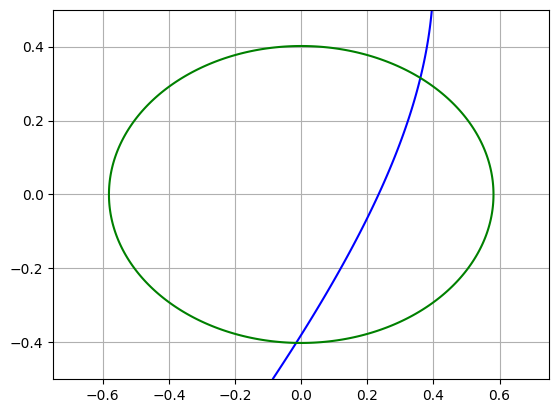

In [34]:
draw()

Точки пересечения с начальными приближениями $(0.4; 0.4)$ и $(0; -0.4)$

[0.36027064 0.31530311]
[-0.01531794 -0.40156154]


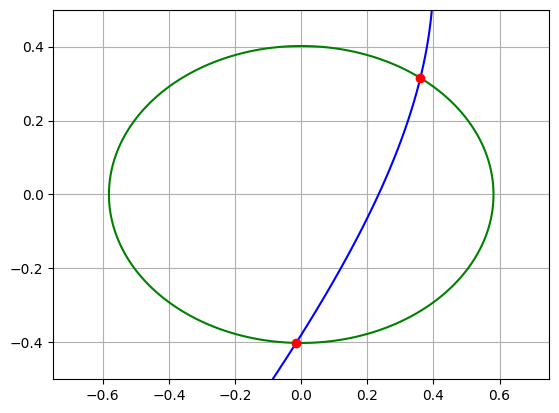

In [35]:
u1 = newton(np.array((0.4, 0.4), dtype=np.float32))
u2 = newton(np.array((0., -0.4), dtype=np.float32))
print(u1, u2, sep='\n')
draw([u1, u2])

Вычислим ошибки, зная точные решения, допустимые машинным представлением, и убедимся, что они не превышают $\varepsilon=10^{-5}$:

In [36]:
u1_ = np.array(( 0.3602643,  0.31530657), dtype=np.float32)
u2_ = np.array((-0.0153181, -0.40156151), dtype=np.float32)
print(np.linalg.norm(u1-u1_), np.linalg.norm(u2-u2_), sep='\n')

7.2256262225356335e-06
1.6876585429438547e-07
